# Fundamental Concepts

## The Agent-Environment Interface
The agent-enviroment interface can be summarized as a sequence $\cdots S_tA_tR_{t+1}S_{t+1}A_{t+1}\cdots$.

The tuple $(S_t, A_t, R_{t+1}, S_{t+1}, A_{t+1})$ can be described as:
1. At time $t$, the agent observes environment's state $S_t$ and takes action $A_t$;
2. This action drives the environment to change its state to $S_{t+1}$, and the agent receives reward $R_{t+1}$ from the enviroment;
3. The Agent takes action $A_{t+1}$ and the cycle continues.

The agent's goal is to maximize its total reward in this process. 
- If the process is finite, we say the agent is doing episodic tasks, and the total reward is defined as $R_1 + \ldots + R_T$.
- If the process is infinite, we say the agent is doing continous task, and the total reward is defined as $R_1 + \gamma R_2 + \gamma^2 R_3 + \ldots$, where $ 0 < \gamma < 1 $ is a discount factor that ensures the sum is finite.

For convenience, we use the unified notation $\sum_{k}\gamma^{k} R_{k+1}$, where $ 0 < \gamma \leq 1$, $\gamma = 1$ iff for episodic tasks.

Often, we are interesed in the return $G_t$, which is defined as the total reward after time $t$. This can be viewed as the feedback to the agent's action $A_t$ taken on state $S_t$. By definition, $G_t = R_{t+1} + \gamma R_{t+2} + \ldots$. Note the recurrsion relation $G_t = R_{t+1} + \gamma G_{t+1}$.

## Markov Property
This says $S_{t+1}$ and $R_{t+1}$ only depends on $S_t, A_t$, but not on any earlier events.
Thus we may write $P(S_{t+1}, R_{t+1} | S_t, A_t )$. Note we can further factorize this as $P(S_{t+1}, R_{t+1} | S_t, A_t ) = P(S_{t+1} | S_t, A_t) P(R_{t+1} | S_{t}, A_{t}, S_{t+1}).$ Note that $R_{t+1}$ has dependency on three variables. 

We can simplify the notation by writing $s, a, s'$ to denote $S_t, A_t, S_{t+1}$. Two more notations:
- $p(s' | s, a)$ denotes the transition probablity $(s, a) \rightarrow s' $
- $r(s, a, s')$ denotes the expectation $\mathbb{E}(R_{t+1} | S_{t} = s, A_{t} = a, S_{t+1} = s')$.

## Value Functions, Bellman Equation
We cannot talk about values without the policy. A policy maps the state to action. This can be deterministic or probabilistic. Usually, we denote the policy by $\pi(s)$, sometimes it's a distribution $p(a|s)$. For deterministic policy, it's just a value.

We can define value for a state or a state-action pair. Informally, the value of a state is the expected return when starting from $s$ and following $\pi$ thereafter. The value of a state-pair is the expected return when starting from $s$ and take action $a$.
$$v_{\pi}(s) = \mathbb{E}_{\pi} (G_t | S_t = s )$$
$$q_{\pi}(s, a) = \mathbb{E}_{\pi}(G_t | S_t = s, A_t = a)$$
The notation is a bit sloppy here: $t$ appears on the RHS but not on the LHS. So the LHS is really $v_{\pi}(S_t = s)$ and $q_{\pi}(S_t = s, A_t = a)$.

\begin{align}
q(s, a) & = \mathbb{E}[ G_t | s, a ] \\
        & = \mathbb{E}[ R_{t+1} + \gamma G_{t+1} | s, a ] \\
        & = \sum_{s'} p(s' | s, a) \mathbb{E} [R_{t+1} + \gamma G_{t+1} | s, a, s'] \\
        & = \sum_{s'} p(s' | s, a) (r(s, a, s') + \gamma v(s')) \\
v(s)    & = \sum_a p(a | s) q(s, a) \\
        & = \sum_a p(a | s) \sum_{s'} p(s' | s, a) (r(s, a, s') + \gamma v(s'))
\end{align}
The last equation that reveals the recurssion relation of $v(s)$ and $v(s')$ is known as the Bellman equation.

The Bellman equation has two implications:
1. It expresses $v(s)$ as a solution of a linear system.
2. It expresses $v(s)$ as a fixed point of a mapping. This suggests we can use iterative methods to solve for $v$. This gives the basic form of policy evaluation.

## Optimal Value Functions
There exists an optimal policy $\pi_{*}$ such that for any other policy $\pi$, we have $v_{\pi_{*}}(s) \geq v_{\pi}(s), \forall s \in S$.

\begin{align}
v_*(s)     & = \max_{\pi} v_{\pi}(s) \\
q_*(s, a)  & = \max_{\pi} q_{\pi}(s, a)
\end{align}

$v_*(s)$ satisfies the Bellman optimal equation. The derivation of the Bellman optimal equation is similar to the regular Bellman equation. The main difference is: $v_*(s) = \max_a q(s, a)$ instead of averaging over the distribution $p(a|s)$.


# Policy Iteration
Policy iteration alternates between policy evaluation and policy improvement:
- Start with an arbitrary policy $\pi$.
- In policy evaluation, we use an iterative method based on the Bellman equation to find $v(s)$. This gives us $q(s, a)$ too.
- In policy improvment, we set $\pi(s) = \text{argmax}_a q(s, a)$.

## Value Iteration
Valute iteration is an approximation of policy iteration. In policy evaluation, we iterate until convergence. In value iteration, we only iterate once. 

This gives a special form of iteration:
$$v(s) = \max_a q(s, a) = \max_a \sum_{s'} p(s' | s, a) (r(s, a, s') + \gamma v(s')) $$

At the end of iteration, we output policy $\pi(s) = \text{argmax}_a q(s, a)$.

### Valute Iteration Example (Gambler's Problem)
A gambler bets on the outcome of a coin flip. If head, he wins the stake; otherwise, he loses the stake. The game ends if the gambler reaches \$100 dollars or \$0 dollars. The gabmler can only bet on integer amounts.

The states are $\{1, \ldots, 99\}$. For state $s$, availabe actions are betting from $\{1, \ldots, \min \{s, 100 - s\} \}$. We give +1 reward when we reach \$100 and give zero reward for all other transitions. We set discount factor $\gamma = 1$. With this setting, the value of each state (under a policy) is the winning probabiliy starting from that state. This is because $v(s) = \mathbb{E}[G_t | s]$ and $G_t$ is either 0 or 1. Thus the expectation evaluates to the probability of winning.

Let $p$ denote the probability of getting a head. Then we have transition $(s, a) \rightarrow s + a$ with probability $p$ and $(s, a) \rightarrow s - a$ with probability $1-p$. $r(s, a, s') = 1$ iff $s' = 100$.

The value iteration is 
$$ v(s) = \max_a [p (r(s, a, s + a) + v(s + a)) + (1-p) v(s-a)]$$


In [1]:
import numpy as np
P_HEAD = 0.4
WIN_STATE = 100
EPSILON = 1e-10

def r(s, a, s_prime):
    return 1 if s_prime == WIN_STATE else 0

# v[0..100]. v[0] and v[100] are held at 0.
def value_iteration(v):
    w = np.zeros(len(v))
    for s in range(1, WIN_STATE, 1):
        q = []
        for a in range(1, min(s, 100 - s) + 1, 1):
            qa = P_HEAD * (r(s, a, s + a) + v[s + a]) + (1 - P_HEAD) * v[s - a]
            q.append(qa)
        w[s] = max(q)
    return w

def solve(epsilon = EPSILON, max_iter = 1000):
    v = np.zeros(WIN_STATE + 1)
    for i in range(max_iter):
        w = value_iteration(v)
        delta = np.linalg.norm(w - v, np.inf)
        v = w
        if delta < epsilon:
            print 'converged after {} iterations'.format(i+1)
            break
    return v

def optimal_policy(v):
    actions = []
    for s in range(1, WIN_STATE, 1):
        best_a, best_qa = 0, 0
        for a in range(1, min(s, 100 - s) + 1, 1):
            qa = P_HEAD * (r(s, a, s + a) + v[s + a]) + (1 - P_HEAD) * v[s - a]
            ## A more robust max function (taking account of numerical errors)
            if qa - best_qa > 1e-6:
                best_qa = qa
                best_a = a
        actions.append(best_a)
    return actions

converged after 34 iterations


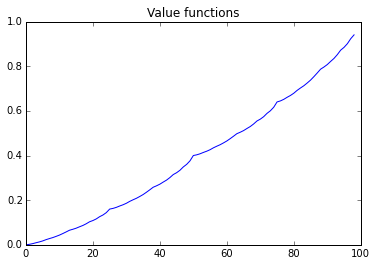

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

w = solve()
plt.plot(w[0:99]);
plt.title('Value functions')
plt.show()

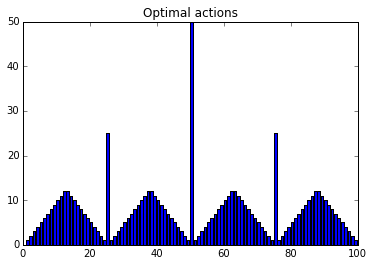

In [3]:
actions = optimal_policy(w)
plt.bar(range(1, 100), actions)
plt.title('Optimal actions')